this is to do high res clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import anndata as ad 
import scanpy as sc
sys.path.append("../../")
import utils
from sklearn.decomposition import PCA
import umap
import graph
import visualize
import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=150)
from pySankey import sankey

<Figure size 1200x1200 with 0 Axes>

In [2]:
sys.executable

'/home/bkzhu/python/miniconda3/envs/spatial_cluster/bin/python3'

In [3]:
cnngnn_embed = np.load("/home/bkzhu/spatial_clustering/phase3/spatial-clust-scripts-main/data/spleen/cnn_l6epoch200_gnn_embedding_dim32.npy")
pd.DataFrame(cnngnn_embed)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.388580,-1.063734,0.433731,-1.226939,0.248371,-0.800424,0.128106,-0.477126,0.331584,-1.393282,...,-0.071796,-1.130015,-1.243502,-1.310044,-1.090409,0.184505,-1.101032,-0.418547,-0.163630,0.118456
1,0.163878,-1.159117,0.193852,-1.317404,-0.195828,-0.822090,0.285602,-0.126203,0.132736,-0.598469,...,0.222313,-0.675650,-0.381631,-0.723327,-0.455655,0.093342,-0.620816,-0.460288,0.119148,0.091694
2,-1.044921,-0.722878,0.132042,-0.965127,0.156793,-0.581670,0.009621,-0.299732,0.201160,-1.048815,...,-0.068033,-0.876414,-1.121657,-0.818376,-0.917161,0.034225,-0.801886,-0.288685,-0.060848,0.321911
3,0.037647,-1.733398,0.032870,-1.528800,0.087552,-0.496864,0.174662,0.026217,0.492487,-0.386498,...,0.251965,-0.826921,-0.391481,-1.114806,-0.708858,0.044281,-1.165830,-0.487221,0.123071,-1.275564
4,0.378840,-0.852400,0.327798,-0.703591,0.067513,-0.279209,0.189608,-0.138789,0.035907,-0.912806,...,0.058484,-0.533254,-0.672541,-0.531541,-0.524562,0.121311,-0.756232,-0.154865,0.140098,0.269654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,-0.023996,-1.196574,0.129965,-0.914157,-0.145523,-0.547487,0.064906,-0.081587,0.210002,-1.018830,...,0.052884,-0.885639,-0.759066,-0.852470,-0.701170,0.180070,-0.698092,-0.139165,0.074458,-0.115110
53496,-0.752521,-0.956146,0.350732,-1.793780,0.674167,-1.097624,0.728240,-0.553144,0.325772,-2.326596,...,-0.062719,-1.372618,-0.349765,-1.631638,-1.024664,0.341906,-2.022975,-0.435617,-0.233717,0.278961
53497,-1.062935,-0.715201,0.534126,-1.121560,0.505356,-0.571302,0.547263,-0.376031,0.331174,-1.581247,...,-0.198928,-0.964049,-0.453769,-1.201400,-0.830045,0.393222,-1.610659,-0.343510,-0.034372,-0.095500
53498,-1.754486,-0.995130,0.800600,-0.993328,0.103587,-0.716144,0.423886,-0.341749,0.432605,-1.442192,...,-0.104780,-0.870549,-0.489202,-1.145223,-1.040334,0.552113,-1.679569,-0.371578,0.117979,-0.381783


In [4]:
train_mask = np.load("/home/bkzhu/spatial_clustering/phase3/spatial-clust-scripts-main/data/spleen/train_mask.npy")
pd.DataFrame(train_mask)

,0
0,True
1,False
2,True
3,True
4,True
...,...
53495,True
53496,False
53497,True
53498,False


In [5]:
cnngnn_embed[train_mask,:]

array([[-1.3885801 , -1.0637339 ,  0.43373078, ..., -0.418547  ,
        -0.16363004,  0.11845623],
       [-1.0449208 , -0.72287816,  0.13204244, ..., -0.28868496,
        -0.0608483 ,  0.32191116],
       [ 0.03764679, -1.7333984 ,  0.03287024, ..., -0.48722103,
         0.12307106, -1.2755637 ],
       ...,
       [-0.02399617, -1.1965739 ,  0.12996471, ..., -0.13916542,
         0.07445794, -0.11510956],
       [-1.0629346 , -0.7152014 ,  0.5341257 , ..., -0.34351042,
        -0.03437164, -0.09549984],
       [-1.5559584 , -0.9203099 ,  0.64469683, ..., -0.39283833,
         0.0942872 , -0.31468683]], dtype=float32)

In [6]:
df = pd.read_csv("/home/bkzhu/spatial_clustering/phase2/data/codex_murine/results/features_and_metadata.csv")
df

,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,MHCII,CD35,CD2135,CD44,nucl,NKp46,cluster.term,centroid_x,centroid_y,field_of_view
0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,0.000000,...,0.000000,217.914412,69.250551,0.000000,9100.068826,572.555576,Other,7.717314,240.809187,1
1,4,7,215,0.000000,0.000000,134.472468,0.000000,1431.469046,73.665657,0.000000,...,2777.771689,1135.190597,96.309696,0.000000,15071.640583,0.000000,B,5.916279,1334.600000,1
2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,1152.344425,...,0.000000,488.606413,245.895189,236.229915,16381.046106,769.252953,Other,9.277078,1167.989924,1
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,2865.632489,0.000000,0.000000,942.795851,2283.347509,312.484433,B,11.430000,1026.952000,1
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,3873.874702,1822.097852,392.223150,5141.479714,23181.488067,575.791169,Mph,10.233890,656.547733,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,67558,220,878,2010.562000,529.468500,0.000000,748.099900,1797.500000,2005.353000,5074.064000,...,1598.876000,1378.769000,555.147900,2139.469000,6670.871000,840.025000,Mph,8856.712984,8078.510251,63
53496,67559,221,947,3151.869000,720.791600,566.963800,534.545700,724.435200,1801.644000,1195.907000,...,1207.646000,778.746000,373.721000,1152.291000,2721.070000,9540.707000,NK,8874.391763,8164.459345,63
53497,67560,223,1827,7266.125000,1077.432000,5073.809000,823.874500,1511.285000,2339.300000,3403.034000,...,2390.090000,1329.873000,688.305400,2439.289000,16289.960000,9927.915000,NK,8883.950739,8099.090312,63
53498,67562,225,1469,3815.305000,863.790400,648.502300,695.037400,978.518100,2769.580000,1735.379000,...,1421.256000,820.447300,483.748100,1724.066000,1054.221000,8091.533000,Other,8965.542546,8106.320626,63


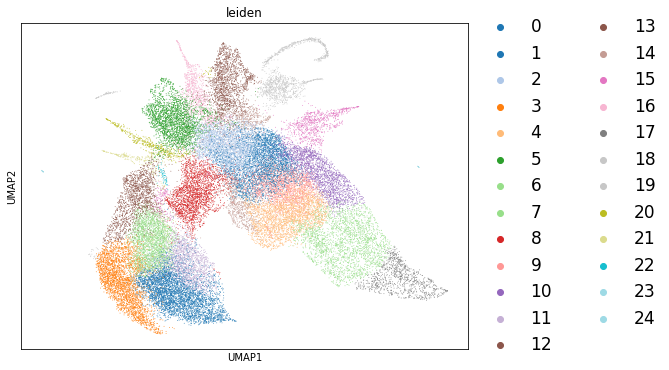

In [7]:
cnngnn_adata = ad.AnnData(utils.drop_zero_variability_columns(cnngnn_embed[train_mask,:]))
sc.pp.scale(cnngnn_adata)
sc.pp.neighbors(cnngnn_adata, n_neighbors=15, use_rep='X')
sc.tl.umap(cnngnn_adata)
sc.tl.leiden(cnngnn_adata, resolution=1)
# plot
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(cnngnn_adata, color='leiden', legend_fontsize=17, show=False, palette='tab20')

/tmp/ipykernel_27647/3428516478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cnngnn_label_res1'] = cnngnn_adata.obs['leiden'].values


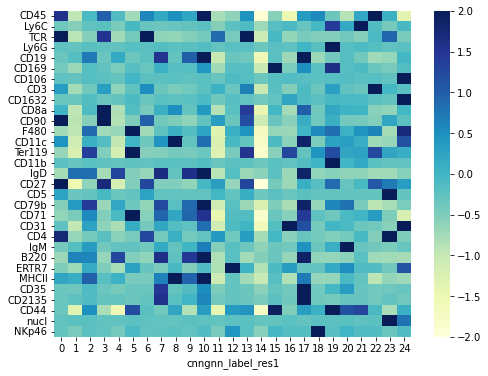

In [8]:
# annotate based on feature expressions
from scipy import stats
df_train = df.loc[train_mask,:]
df_train['cnngnn_label_res1'] = cnngnn_adata.obs['leiden'].values
tmp = df_train.groupby(by='cnngnn_label_res1').mean()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                'centroid_x', 'centroid_y', 'field_of_view'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2)

feature version

/tmp/ipykernel_27647/4270055244.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  feature_adata = ad.AnnData(df_train.iloc[:,3:-6]) # remove meta info
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


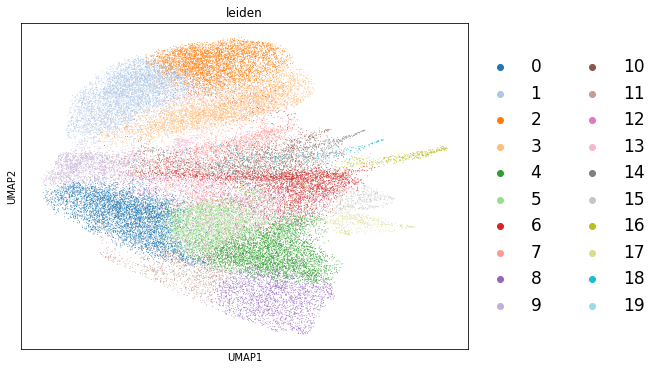

In [9]:
feature_adata = ad.AnnData(df_train.iloc[:,3:-6]) # remove meta info
sc.pp.scale(feature_adata)
sc.pp.neighbors(feature_adata, n_neighbors=15, use_rep='X')
sc.tl.umap(feature_adata)
sc.tl.leiden(feature_adata, resolution=1)
# plot
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(feature_adata, color='leiden', legend_fontsize=17, show=False, palette='tab20')

/tmp/ipykernel_27647/1902630384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['feature_label'] = feature_adata.obs['leiden'].values


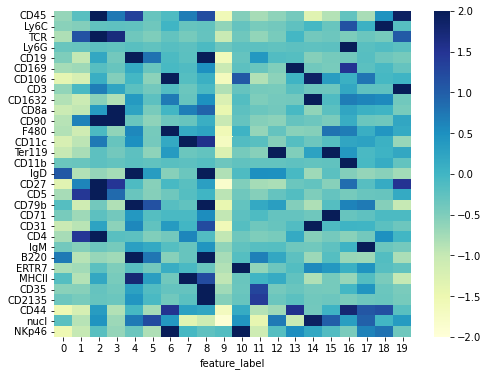

In [10]:
# annotate based on feature expressions
from scipy import stats
df_train['feature_label'] = feature_adata.obs['leiden'].values
tmp = df_train.groupby(by='feature_label').mean()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                'centroid_x', 'centroid_y', 'field_of_view'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2)

make sankey plot for fun

In [11]:
## add 
df_train['feature_annotation1'] = df_train['feature_label']
new_cluster_names = {
    '0':'B', '1':'CD4', '2':'CD4', '3':'CD8', '4':'B', '5':'B',
    '6':'Mph', '7':'DC', '8':'gcB', '9':'empty', '10':'ERTR7', '11':'gcB',
    '12':'Vessel', '13':'Mph', '14':'Vessel', '15':'erythroid', '16':'mono', '17':'B',
    '18':'lygc', '19':'otherT'
}
df_train=df_train.replace({"feature_annotation1": new_cluster_names})
df_train

/tmp/ipykernel_27647/3547413835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['feature_annotation1'] = df_train['feature_label']


,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,CD44,nucl,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cnngnn_label_res1,feature_label,feature_annotation1
0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,0.000000,...,0.000000,9100.068826,572.555576,Other,7.717314,240.809187,1,16,14,Vessel
2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,1152.344425,...,236.229915,16381.046106,769.252953,Other,9.277078,1167.989924,1,16,14,Vessel
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,942.795851,2283.347509,312.484433,B,11.430000,1026.952000,1,4,0,B
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,5141.479714,23181.488067,575.791169,Mph,10.233890,656.547733,1,5,6,Mph
5,13,20,962,509.396300,749.311868,2792.380994,481.699885,2686.071878,2194.284007,4571.372886,...,3855.722089,20957.904279,473.137516,Mph,15.399168,270.177755,1,2,6,Mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53492,67555,216,239,4341.184000,433.178400,3078.405000,0.000000,0.000000,0.000000,0.000000,...,418.667000,5662.217000,936.526600,CD8 T,8834.054393,8069.702929,63,13,1,CD4
53493,67556,217,490,0.000000,0.000000,0.000000,0.000000,0.000000,1000.817000,1733.176000,...,2906.782000,9361.789000,12756.060000,NK,8839.063265,8141.487755,63,18,10,ERTR7
53495,67558,220,878,2010.562000,529.468500,0.000000,748.099900,1797.500000,2005.353000,5074.064000,...,2139.469000,6670.871000,840.025000,Mph,8856.712984,8078.510251,63,5,6,Mph
53497,67560,223,1827,7266.125000,1077.432000,5073.809000,823.874500,1511.285000,2339.300000,3403.034000,...,2439.289000,16289.960000,9927.915000,NK,8883.950739,8099.090312,63,18,10,ERTR7


In [12]:
df_train['cnngnn_annotation1'] = df_train['cnngnn_label_res1']
new_cluster_names = {
    '0':'CD4', '1':'B', '2':'Mph', '3':'CD8', '4':'B', '5':'Mph',
    '6':'CD4', '7':'gcB', '8':'DC', '9':'B', '10':'gcB', '11':'CD4',
    '12':'ERTR7', '13':'CD8', '14':'empty', '15':'Mph', '16':'Vessel', '17':'gcB',
    '18':'NK', '19':'mono', '20':'B', '21':'ly6c', '22':'otherT', '23':'CD4', '24':'erythroid'
}
df_train=df_train.replace({"cnngnn_annotation1": new_cluster_names})
df_train

,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,nucl,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cnngnn_label_res1,feature_label,feature_annotation1,cnngnn_annotation1
0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,0.000000,...,9100.068826,572.555576,Other,7.717314,240.809187,1,16,14,Vessel,Vessel
2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,1152.344425,...,16381.046106,769.252953,Other,9.277078,1167.989924,1,16,14,Vessel,Vessel
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,2283.347509,312.484433,B,11.430000,1026.952000,1,4,0,B,B
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,23181.488067,575.791169,Mph,10.233890,656.547733,1,5,6,Mph,Mph
5,13,20,962,509.396300,749.311868,2792.380994,481.699885,2686.071878,2194.284007,4571.372886,...,20957.904279,473.137516,Mph,15.399168,270.177755,1,2,6,Mph,Mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53492,67555,216,239,4341.184000,433.178400,3078.405000,0.000000,0.000000,0.000000,0.000000,...,5662.217000,936.526600,CD8 T,8834.054393,8069.702929,63,13,1,CD4,CD8
53493,67556,217,490,0.000000,0.000000,0.000000,0.000000,0.000000,1000.817000,1733.176000,...,9361.789000,12756.060000,NK,8839.063265,8141.487755,63,18,10,ERTR7,NK
53495,67558,220,878,2010.562000,529.468500,0.000000,748.099900,1797.500000,2005.353000,5074.064000,...,6670.871000,840.025000,Mph,8856.712984,8078.510251,63,5,6,Mph,Mph
53497,67560,223,1827,7266.125000,1077.432000,5073.809000,823.874500,1511.285000,2339.300000,3403.034000,...,16289.960000,9927.915000,NK,8883.950739,8099.090312,63,18,10,ERTR7,NK


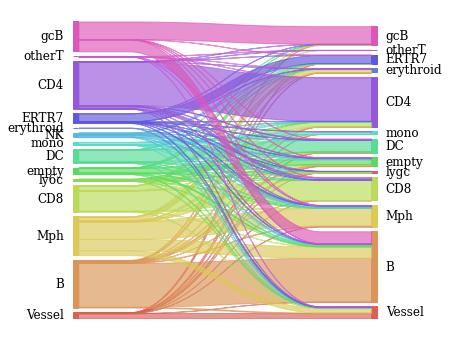

In [13]:
sankey.sankey(
    df_train['cnngnn_annotation1'], df_train['feature_annotation1'], aspect=20,
    fontsize=12
)

before clustering them into higher resolution, lets look a little bit more about flow change

interesting examples:

gcB --> B

Mphage -->B

In [14]:
df_train['res1_flow'] = "None"

gc2b_idx = (df_train['cnngnn_annotation1'] == 'gcB') & (df_train['feature_annotation1'] == 'B')
df_train.loc[gc2b_idx,'res1_flow'] = 'gc2b'

mph2b_idx = (df_train['cnngnn_annotation1'] == 'Mph') & (df_train['feature_annotation1'] == 'B')
df_train.loc[mph2b_idx,'res1_flow'] = 'mph2b'

df_train

,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cnngnn_label_res1,feature_label,feature_annotation1,cnngnn_annotation1,res1_flow
0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,0.000000,...,572.555576,Other,7.717314,240.809187,1,16,14,Vessel,Vessel,None
2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,1152.344425,...,769.252953,Other,9.277078,1167.989924,1,16,14,Vessel,Vessel,None
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,312.484433,B,11.430000,1026.952000,1,4,0,B,B,None
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,575.791169,Mph,10.233890,656.547733,1,5,6,Mph,Mph,None
5,13,20,962,509.396300,749.311868,2792.380994,481.699885,2686.071878,2194.284007,4571.372886,...,473.137516,Mph,15.399168,270.177755,1,2,6,Mph,Mph,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53492,67555,216,239,4341.184000,433.178400,3078.405000,0.000000,0.000000,0.000000,0.000000,...,936.526600,CD8 T,8834.054393,8069.702929,63,13,1,CD4,CD8,None
53493,67556,217,490,0.000000,0.000000,0.000000,0.000000,0.000000,1000.817000,1733.176000,...,12756.060000,NK,8839.063265,8141.487755,63,18,10,ERTR7,NK,None
53495,67558,220,878,2010.562000,529.468500,0.000000,748.099900,1797.500000,2005.353000,5074.064000,...,840.025000,Mph,8856.712984,8078.510251,63,5,6,Mph,Mph,None
53497,67560,223,1827,7266.125000,1077.432000,5073.809000,823.874500,1511.285000,2339.300000,3403.034000,...,9927.915000,NK,8883.950739,8099.090312,63,18,10,ERTR7,NK,None


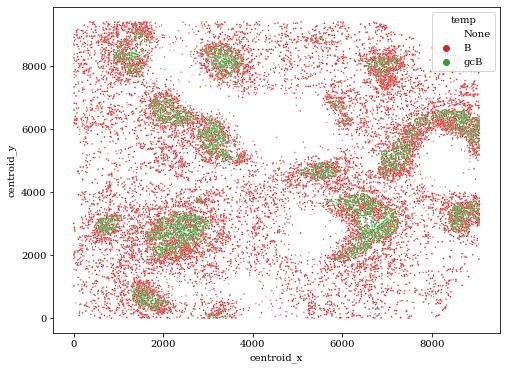

In [15]:
tp = df_train.copy()
tp['temp'] = 'None'
tp.loc[(tp['feature_annotation1'] =='B'),'temp'] = 'B'
tp.loc[(tp['feature_annotation1'] =='gcB'),'temp'] = 'gcB'

palette = {"None":"w",
           "B":"tab:red", 
           "gcB":"tab:green"}

sns.scatterplot(data=tp, x="centroid_x", y="centroid_y", hue="temp", s = 3, palette=palette)

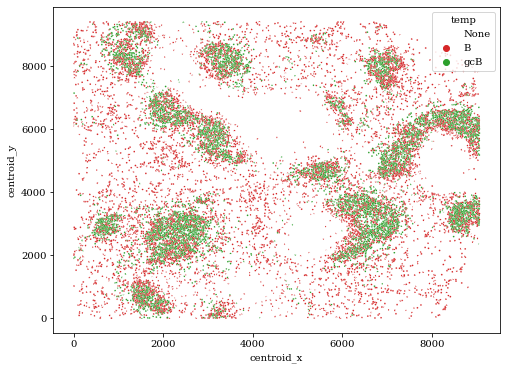

In [16]:
tp = df_train.copy()
tp['temp'] = 'None'
tp.loc[(tp['cnngnn_annotation1'] =='B'),'temp'] = 'B'
tp.loc[(tp['cnngnn_annotation1'] =='gcB'),'temp'] = 'gcB'

palette = {"None":"w",
           "B":"tab:red", 
           "gcB":"tab:green"}

sns.scatterplot(data=tp, x="centroid_x", y="centroid_y", hue="temp", s = 3, palette=palette)

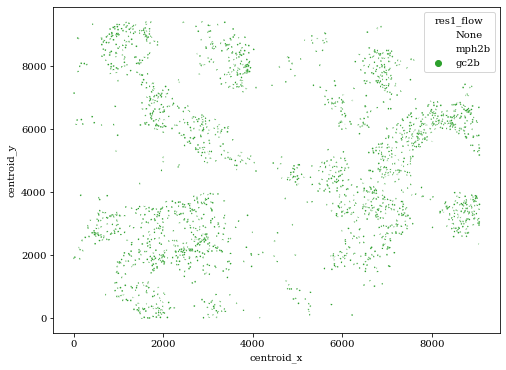

In [17]:
# color palette as dictionary
palette = {"None":"w",
           "mph2b":"w", 
           "gc2b":"tab:green"}

tp = df_train.copy()
sns.scatterplot(data=tp, x="centroid_x", y="centroid_y", hue="res1_flow", s = 3, palette=palette)

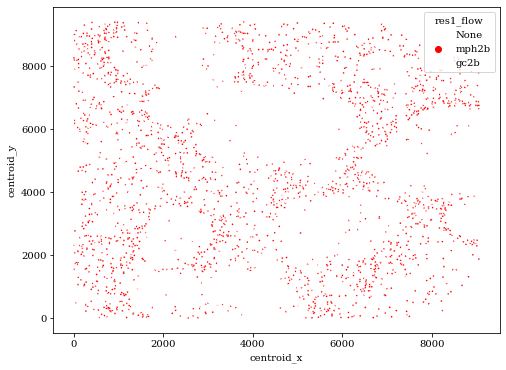

In [18]:
# color palette as dictionary
palette = {"None":"w",
           "mph2b":"r", 
           "gc2b":"w"}

tp = df_train.copy()
sns.scatterplot(data=tp, x="centroid_x", y="centroid_y", hue="res1_flow", s = 3, palette=palette)

perhaps should look at their expression profile

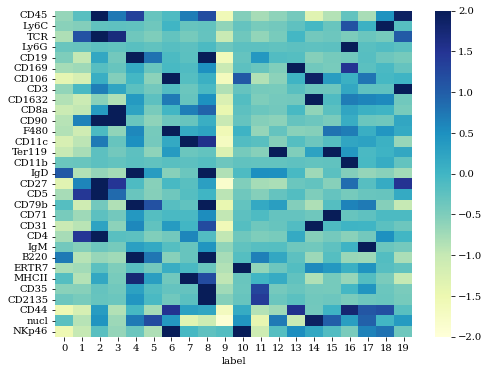

In [19]:
## this is just recheck average by feature clustering

from scipy.stats import zscore
#tmp = df_train.groupby(by='feature_label').mean()
tmp = df_train
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                'centroid_x', 'centroid_y', 'field_of_view',
                "cluster.term","cnngnn_label_res1","feature_label",
               "feature_annotation1","cnngnn_annotation1","res1_flow",
               "res1_flow"], axis=1)
tmp = tmp.apply(zscore)
tmp['label'] = df_train['feature_label']
tmp2 = tmp.groupby(by='label').mean()
sns.heatmap((stats.zscore(tmp2, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2)

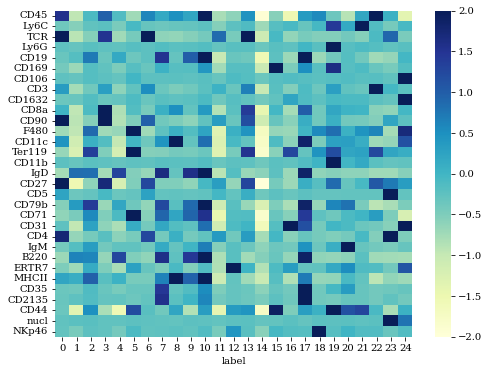

In [20]:
## this is just recheck average by feature clustering

from scipy.stats import zscore
#tmp = df_train.groupby(by='feature_label').mean()
tmp = df_train
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                'centroid_x', 'centroid_y', 'field_of_view',
                "cluster.term","cnngnn_label_res1","feature_label",
               "feature_annotation1","cnngnn_annotation1","res1_flow",
               "res1_flow"], axis=1)
tmp = tmp.apply(zscore)
tmp['label'] = df_train['cnngnn_label_res1']
tmp2 = tmp.groupby(by='label').mean()
sns.heatmap((stats.zscore(tmp2, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2)

ok go back to gcB problem

In [21]:
df_train['res1_flow'] = "None"

gc2b_idx = (df_train['cnngnn_annotation1'] == 'gcB') & (df_train['feature_annotation1'] == 'B')
df_train.loc[gc2b_idx,'res1_flow'] = 'gc2b'

mph2b_idx = (df_train['cnngnn_annotation1'] == 'Mph') & (df_train['feature_annotation1'] == 'B')
df_train.loc[mph2b_idx,'res1_flow'] = 'mph2b'

cfdb_idx = (df_train['cnngnn_annotation1'] == 'B') & (df_train['feature_annotation1'] == 'B')
df_train.loc[cfdb_idx,'res1_flow'] = 'cfdB'

cfdgcb_idx = (df_train['cnngnn_annotation1'] == 'gcB') & (df_train['feature_annotation1'] == 'gcB')
df_train.loc[cfdgcb_idx,'res1_flow'] = 'cfdgcB'

cfdmph_idx = (df_train['cnngnn_annotation1'] == 'Mph') & (df_train['feature_annotation1'] == 'Mph')
df_train.loc[cfdmph_idx,'res1_flow'] = 'cfdMphage'

cfdcd4_idx = (df_train['cnngnn_annotation1'] == 'CD4') & (df_train['feature_annotation1'] == 'CD4')
df_train.loc[cfdcd4_idx,'res1_flow'] = 'cfdCD4'

cfdcd8_idx = (df_train['cnngnn_annotation1'] == 'CD8') & (df_train['feature_annotation1'] == 'CD8')
df_train.loc[cfdcd8_idx,'res1_flow'] = 'cfdCD8'

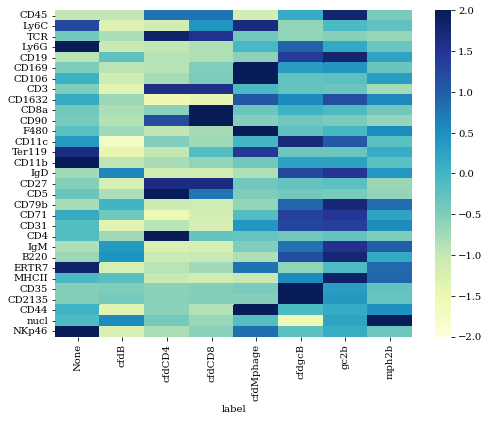

In [22]:
## this is just recheck average by feature clustering

from scipy.stats import zscore
tmp = df_train
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                'centroid_x', 'centroid_y', 'field_of_view',
                "cluster.term","cnngnn_label_res1","feature_label",
               "feature_annotation1","cnngnn_annotation1","res1_flow",
               "res1_flow"], axis=1)
tmp = tmp.apply(zscore)
tmp['label'] = df_train['res1_flow']
tmp2 = tmp.groupby(by='label').mean()
sns.heatmap((stats.zscore(tmp2, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2)

In [23]:
df_train.res1_flow.value_counts()

None         12559
cfdB          7959
cfdCD4        7927
cfdCD8        3685
cfdgcB        3210
cfdMphage     3182
gc2b          2186
mph2b         2092
Name: res1_flow, dtype: int64

In [24]:
df_sub = df_train.loc[df_train.res1_flow.isin(['mph2b','gc2b','cfdgcB','cfdMphage','cfdB']),:]
df_sub

,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,...,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cnngnn_label_res1,feature_label,feature_annotation1,cnngnn_annotation1,res1_flow
3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,49.372156,...,312.484433,B,11.430000,1026.952000,1,4,0,B,B,cfdB
4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,3003.585919,...,575.791169,Mph,10.233890,656.547733,1,5,6,Mph,Mph,cfdMphage
5,13,20,962,509.396300,749.311868,2792.380994,481.699885,2686.071878,2194.284007,4571.372886,...,473.137516,Mph,15.399168,270.177755,1,2,6,Mph,Mph,cfdMphage
6,15,24,1771,3330.500543,347.770031,628.837633,229.324027,1213.505885,912.482786,2860.321815,...,574.822023,B,20.816488,1219.958216,1,5,6,Mph,Mph,cfdMphage
13,35,45,1320,2175.116912,547.186667,1975.788706,327.228390,2804.364278,1538.445697,1822.139391,...,447.813251,B,57.665909,488.761364,1,2,5,B,Mph,mph2b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53472,67529,183,1014,2473.292000,247.153500,829.720100,285.840600,1377.869000,1236.083000,1824.313000,...,1151.813000,B,8670.567061,8187.803748,63,1,5,B,B,cfdB
53478,67538,196,1396,5842.960000,548.146800,157.832600,128.527600,1689.497000,1834.624000,4985.368000,...,698.336300,Mph,8702.326648,8151.404728,63,5,6,Mph,Mph,cfdMphage
53485,67547,205,1187,4745.189000,1473.215000,1521.202000,2760.580000,2190.788000,2690.441000,5134.794000,...,3937.800000,B,8766.818871,8108.856782,63,20,17,B,B,cfdB
53487,67549,208,1182,4125.845000,576.066100,1181.957000,63.255550,1665.893000,1527.567000,2913.791000,...,1023.871000,B,8790.917090,8085.615905,63,5,6,Mph,Mph,cfdMphage


/tmp/ipykernel_27647/3344812979.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  feature_adata_sub = ad.AnnData(df_sub.iloc[:,3:-9]) # remove meta info
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


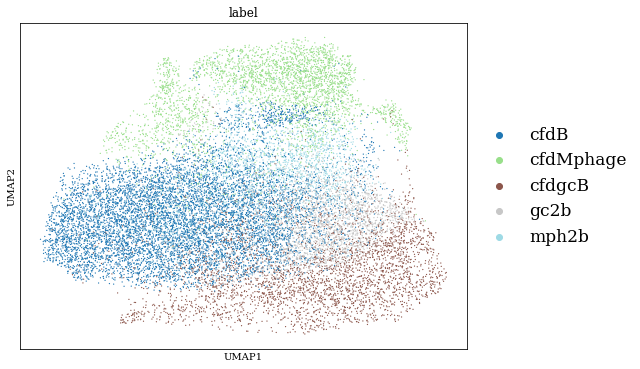

In [25]:
feature_adata_sub = ad.AnnData(df_sub.iloc[:,3:-9]) # remove meta info
sc.pp.scale(feature_adata_sub)
sc.pp.neighbors(feature_adata_sub, n_neighbors=15, use_rep='X')
sc.tl.umap(feature_adata_sub)
sc.tl.leiden(feature_adata_sub, resolution=0.1)
# plot
feature_adata_sub.obs['label'] = list(df_sub['res1_flow'])
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(feature_adata_sub, color='label', legend_fontsize=17, show=False, palette='tab20')

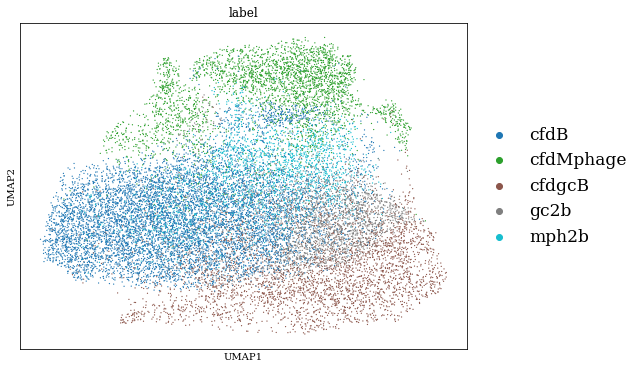

In [26]:
sc.pl.umap(feature_adata_sub, color='label', legend_fontsize=17, show=False, palette='tab10')

## what about cnngnn embedding can we separate them???

In [29]:
cnngnn_sub = utils.drop_zero_variability_columns(cnngnn_embed[train_mask,:])
cnngnn_subsub = cnngnn_sub[df_train.res1_flow.isin(['mph2b','gc2b','cfdgcB','cfdMphage','cfdB']),:]
cnngnn_subsub.shape

(18629, 32)

In [30]:
feature_adata_sub # make sure same as feature embedding

AnnData object with n_obs × n_vars = 18629 × 31
    obs: 'leiden', 'label'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden', 'label_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

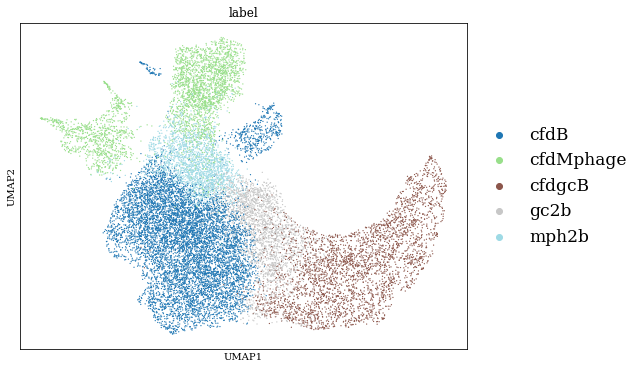

In [32]:
cnngnn_adata_sub = ad.AnnData(cnngnn_subsub) # remove meta info
sc.pp.scale(cnngnn_adata_sub)
sc.pp.neighbors(cnngnn_adata_sub, n_neighbors=15, use_rep='X')
sc.tl.umap(cnngnn_adata_sub)
sc.tl.leiden(cnngnn_adata_sub, resolution=0.1)
# plot
cnngnn_adata_sub.obs['label'] = list(df_sub['res1_flow'])
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(cnngnn_adata_sub, color='label', legend_fontsize=17, show=False, palette='tab20')

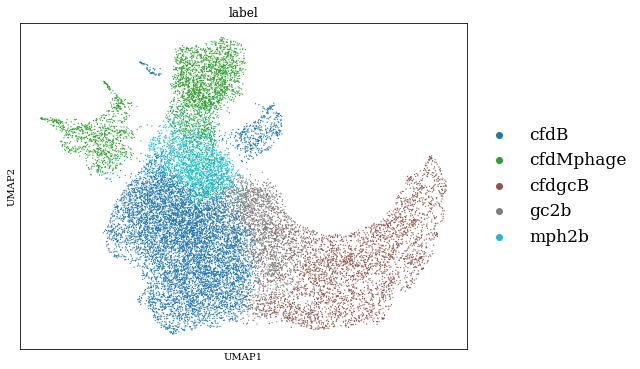

In [33]:
sc.pl.umap(cnngnn_adata_sub, color='label', legend_fontsize=17, show=False, palette='tab10')